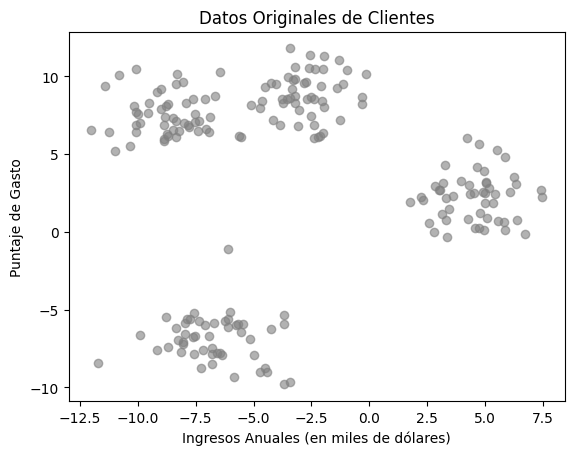

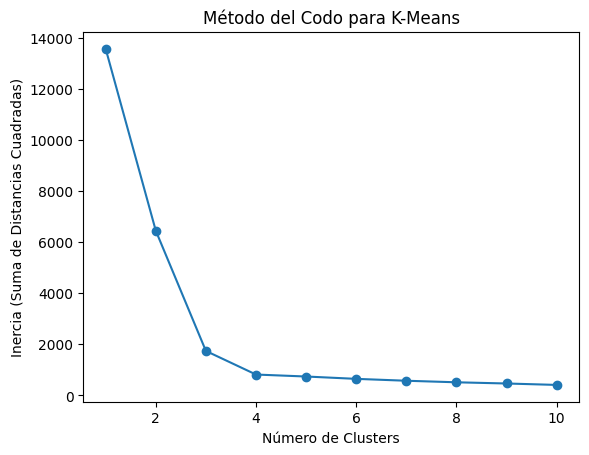

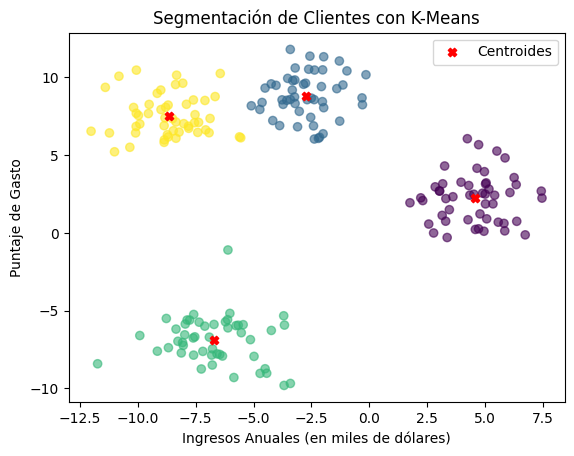

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generamos datos sintéticos para la segmentación de clientes
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.5, random_state=42)

# Convertimos los datos en un DataFrame para mayor claridad
df = pd.DataFrame(X, columns=["Ingresos Anuales", "Puntaje de Gasto"])

# Visualizamos los datos sin etiquetar
plt.scatter(df["Ingresos Anuales"], df["Puntaje de Gasto"], c='gray', alpha=0.6)
plt.xlabel("Ingresos Anuales (en miles de dólares)")
plt.ylabel("Puntaje de Gasto")
plt.title("Datos Originales de Clientes")
plt.show()

# Método del Codo para encontrar el número óptimo de clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de Distancias Cuadradas)")
plt.title("Método del Codo para K-Means")
plt.show()

# Aplicamos K-Means con el número óptimo de clusters (supongamos k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Asignamos los clusters al DataFrame
df['Cluster'] = kmeans.labels_

# Visualizamos los clusters resultantes
plt.scatter(df["Ingresos Anuales"], df["Puntaje de Gasto"], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroides')
plt.xlabel("Ingresos Anuales (en miles de dólares)")
plt.ylabel("Puntaje de Gasto")
plt.title("Segmentación de Clientes con K-Means")
plt.legend()
plt.show()
